In [2]:
import sys
sys.path.append('../')

import os
import os.path as osp
import numpy as np
import pickle

from dataloading.imports import GESTURE_NAMES
from dataloading.visualize import visualize_samples
from dataloading.extract_load import extract_files, load_files
import dataloading.transform as T

### Data extraction
We will unpack the uWave .zip file and then the resulting .rar files.

In [3]:
path_in = '../data/uWaveGestureLibrary.zip'
path_extract = '../data/uwave/'

data = load_files(path_extract)
with open(osp.join(path_extract, 'uwave.pkl'), 'wb') as f:
    pickle.dump(data, f)

Loaded 4481 files.


### Visualization
To visualize the data, we will integrate the acceleration once to convert it to velocity data.
Note that this is also done during training as it improved the results.

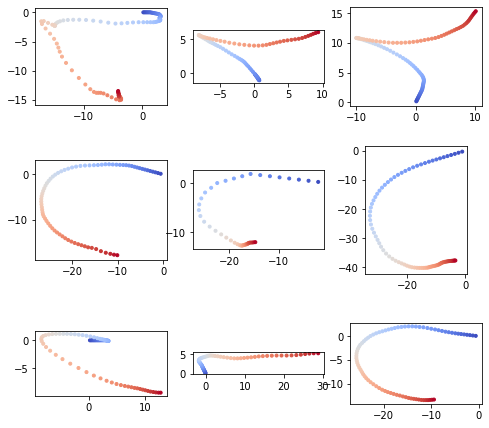

In [9]:
with open('../data/uwave/uwave.pkl', 'rb') as f:
    data = pickle.load(f)

data = T.integrate_acceleration(data)

gesture_idx = GESTURE_NAMES[2] # Change this to show examples for other gestures
indices = np.random.randint(500, size=9)

visualize_samples([data[gesture_idx][idx] for idx in indices], figsize=(8,8))